<a href="https://colab.research.google.com/github/FullPowerMore02/data-mining/blob/main/Quiz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/covid_19_clean_complete.csv'
df = pd.read_csv(file_path)
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [12]:
#ข้อมูลมีขนาดเท่าไหร่
print("ขนาดของข้อมูล:", num_rows)

ขนาดของข้อมูล: 49068


In [13]:
#มีกี่ตัวแปร
print("จำนวนตัวแปร:", num_cols)

จำนวนตัวแปร: 10


In [14]:
#ตัวแปร อะไรบ้าง
print("ชื่อตัวแปร:",df.columns.tolist())


ชื่อตัวแปร: ['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'WHO Region']


In [6]:
#ข้อมูลมีการเก็บสถิติการติดโควิดเมื่อใด? (วันเริ่มต้น - วันสุดท้าย)
# สำหรับวิเคราะห์ข้อมูลเวลา ให้แปลงคอลัมน์ 'Date' เป็นรูปแบบ datetime
df['Date'] = pd.to_datetime(df['Date'])

# หาวันเริ่มต้นและสิ้นสุดของชุดข้อมูล
start_date = df['Date'].min()
end_date = df['Date'].max()

print("วันเริ่มต้น:", start_date)
print("สิ้นสุด:", end_date)


วันเริ่มต้น: 2020-01-22 00:00:00
สิ้นสุด: 2020-07-27 00:00:00


In [7]:
#สำรวจค่าว่างในข้อมูล ตัวแปรไหนมีค่าสูญหายบ้าง จำนวนเท่าไหร่
# นับค่าว่างในแต่ละคอลัมน์
missing_values = df.isna().sum()

# แสดงจำนวนค่าว่างในแต่ละคอลัมน์
print("จำนวนค่าว่างในแต่ละคอลัมน์:")
print(missing_values)


จำนวนค่าว่างในแต่ละคอลัมน์:
Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


In [8]:
# จัดกลุ่มข้อมูลตามทวีปและหาผลรวมของจำนวนเคสยืนยัน
continent_cases = df.groupby('WHO Region')['Confirmed'].sum()

# หาทวีปที่มีจำนวนเคสยืนยันมากที่สุด
max_confirmed_continent = continent_cases.idxmax()
max_confirmed_count = continent_cases.max()

print("ทวีปที่มีจำนวนเคสยืนยันมากที่สุด:", max_confirmed_continent)
print("จำนวนเคสยืนยันทั้งหมดในทวีป:", max_confirmed_count)


ทวีปที่มีจำนวนเคสยืนยันมากที่สุด: Americas
จำนวนเคสยืนยันทั้งหมดในทวีป: 402261194


In [9]:
# จัดกลุ่มข้อมูลตามทวีปและหาผลรวมของจำนวนผู้หายติด
continent_recovered = df.groupby('WHO Region')['Recovered'].sum()

# หาทวีปที่มีจำนวนผู้หายติดมากที่สุด
max_recovered_continent = continent_recovered.idxmax()
max_recovered_count = continent_recovered.max()

print("ทวีปที่มีจำนวนผู้หายติดมากที่สุด:", max_recovered_continent)
print("จำนวนผู้หายติดทั้งหมดในทวีป:", max_recovered_count)


ทวีปที่มีจำนวนผู้หายติดมากที่สุด: Americas
จำนวนผู้หายติดทั้งหมดในทวีป: 157069444


In [10]:
#ทวีปไหนมีจำนวนผู้หายติด (Recovered) มากที่สุด
# จัดกลุ่มข้อมูลตามทวีปและหาผลรวมของจำนวนผู้เสียชีวิต
continent_deaths = df.groupby('WHO Region')['Deaths'].sum()

# หาทวีปที่มีจำนวนผู้เสียชีวิตมากที่สุด
max_deaths_continent = continent_deaths.idxmax()
max_deaths_count = continent_deaths.max()

print("ทวีปที่มีจำนวนผู้เสียชีวิตมากที่สุด:", max_deaths_continent)
print("จำนวนผู้เสียชีวิตทั้งหมดในทวีป:", max_deaths_count)


ทวีปที่มีจำนวนผู้เสียชีวิตมากที่สุด: Americas
จำนวนผู้เสียชีวิตทั้งหมดในทวีป: 19359292


<Figure size 1000x600 with 0 Axes>

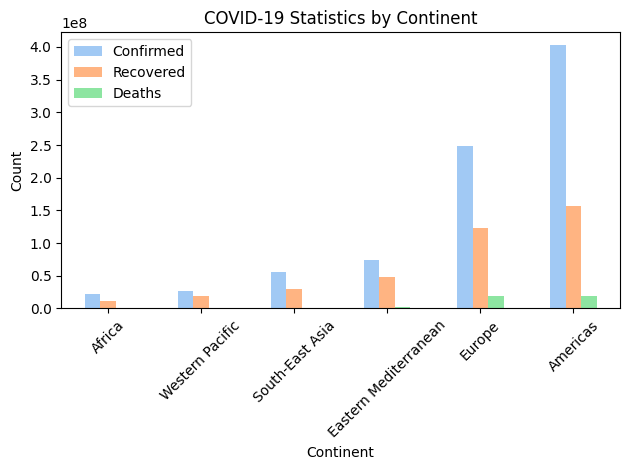

In [17]:
#สร้าง Visualization ของค่าสถิติทั้งสามด้านบน เรียงจากจำนวนมากไปน้อย
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate statistics by continent
continent_stats = df.groupby('WHO Region').agg({'Confirmed': 'sum', 'Recovered': 'sum', 'Deaths': 'sum'})

# Sort continents by the confirmed cases in ascending order
continent_stats_sorted = continent_stats.sort_values(by='Confirmed')

# Create a bar plot for the statistics
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
ax = continent_stats_sorted.plot(kind='bar')
plt.title('COVID-19 Statistics by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [23]:
#ประเทศไหนมีจำนวนเคส (Confirmed) มากที่สุด
continent_deaths = df.groupby('Country/Region')['Confirmed'].sum()

max_deaths_continent = continent_deaths.idxmax()
max_deaths_count = continent_deaths.max()

print("ประเทศที่มีจำนวนเคสมากที่สุด:", max_deaths_continent)
print("จำนวนเคสทั้งหมดในประเทศ:", max_deaths_count)


ประเทศที่มีจำนวนเคสมากที่สุด: US
จำนวนเคสทั้งหมดในประเทศ: 224345948


In [24]:
#ประเทศไหนมีจำนวนผู้เสียชีวิต (Deaths) มากที่สุด
continent_deaths = df.groupby('Country/Region')['Deaths'].sum()

max_deaths_continent = continent_deaths.idxmax()
max_deaths_count = continent_deaths.max()

print("ประเทศที่มีจำนวนผู้เสียชีวิตมากที่สุด:", max_deaths_continent)
print("จำนวนผู้เสียชีวิตทั้งหมดในประเทศ:", max_deaths_count)


ประเทศที่มีจำนวนผู้เสียชีวิตมากที่สุด: US
จำนวนผู้เสียชีวิตทั้งหมดในประเทศ: 11011411


In [26]:
#ประเทศไหนมีจำนวนผู้หายติด (Recovered) มากที่สุด
continent_deaths = df.groupby('Country/Region')['Recovered'].sum()

max_deaths_continent = continent_deaths.idxmax()
max_deaths_count = continent_deaths.max()

print("ประเทศที่มีจำนวนผู้หายติดมากที่สุด:", max_deaths_continent)
print("จำนวนผู้หายติดทั้งหมดในประเทศ:", max_deaths_count)

ประเทศที่มีจำนวนผู้หายติดมากที่สุด: US
จำนวนผู้หายติดทั้งหมดในประเทศ: 56353416


<Figure size 1000x600 with 0 Axes>

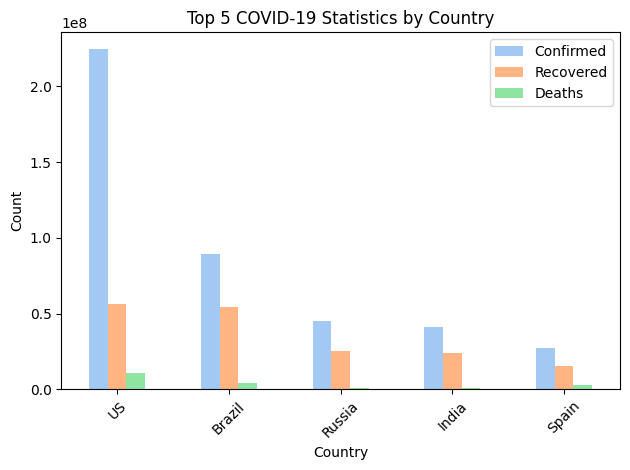

In [28]:
#สร้าง Visualization ของค่าสถิติทั้งสามด้านบน เรียงจากจำนวนมากไปน้อย
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual dataset

# Calculate statistics by country
country_stats = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Recovered': 'sum', 'Deaths': 'sum'})

# Sort countries by the confirmed cases in descending order and select the top 5 countries
top_countries = country_stats.sort_values(by='Confirmed', ascending=False).head(5)

# Create a bar plot for the top countries' statistics
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
ax = top_countries.plot(kind='bar')
plt.title('Top 5 COVID-19 Statistics by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [29]:
#สรุปข้อมูลโควิดประจำวันของประเทศไทย
# Filter data for Thailand
thailand_data = df[df['Country/Region'] == 'Thailand']

# Group by Date and sum up the statistics
daily_thailand_stats = thailand_data.groupby('Date').agg({'Confirmed': 'sum', 'Recovered': 'sum', 'Deaths': 'sum'})

# Print the summary
print(daily_thailand_stats)


            Confirmed  Recovered  Deaths
Date                                    
2020-01-22          2          0       0
2020-01-23          3          0       0
2020-01-24          5          0       0
2020-01-25          7          0       0
2020-01-26          8          2       0
...               ...        ...     ...
2020-07-23       3279       3107      58
2020-07-24       3279       3107      58
2020-07-25       3282       3109      58
2020-07-26       3291       3109      58
2020-07-27       3297       3111      58

[188 rows x 3 columns]


In [48]:
#สรุปข้อมูลโควิดประจำวันของประเทศไทย ในช่วงก่อนเทศกาลสงกรานต์หนึ่งสัปดาห์ ระหว่างเทศกาลสงกรานต์ (13-18 เม.ย.) และหลังเทศกาลสงกรานต์หนึ่งสัปดาห์
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for Thailand
thailand_data = df[df['Country/Region'] == 'Thailand']

# Define date ranges
start_date_before_songkran = pd.to_datetime('2020-04-06')
end_date_before_songkran = pd.to_datetime('2020-04-12')

start_date_during_songkran = pd.to_datetime('2020-04-13')
end_date_during_songkran = pd.to_datetime('2020-04-18')

start_date_after_songkran = pd.to_datetime('2020-04-19')
end_date_after_songkran = pd.to_datetime('2020-04-25')

# Filter data for each date range
thailand_before_songkran = thailand_data[(thailand_data['Date'] >= start_date_before_songkran) & (thailand_data['Date'] <= end_date_before_songkran)]
thailand_during_songkran = thailand_data[(thailand_data['Date'] >= start_date_during_songkran) & (thailand_data['Date'] <= end_date_during_songkran)]
thailand_after_songkran = thailand_data[(thailand_data['Date'] >= start_date_after_songkran) & (thailand_data['Date'] <= end_date_after_songkran)]

# Group by Date and sum up the statistics for each period
daily_before_songkran_stats = thailand_before_songkran.groupby('Date').agg({'Confirmed': 'sum', 'Recovered': 'sum', 'Deaths': 'sum'})
daily_during_songkran_stats = thailand_during_songkran.groupby('Date').agg({'Confirmed': 'sum', 'Recovered': 'sum', 'Deaths': 'sum'})
daily_after_songkran_stats = thailand_after_songkran.groupby('Date').agg({'Confirmed': 'sum', 'Recovered': 'sum', 'Deaths': 'sum'})

# Print the summaries for each period
print("ข้อมูลก่อนเทศกาลสงกรานต์:")
print(daily_before_songkran_stats)

print("\nข้อมูลระหว่างเทศกาลสงกรานต์:")
print(daily_during_songkran_stats)

print("\nข้อมูลหลังเทศกาลสงกรานต์:")
print(daily_after_songkran_stats)


ข้อมูลก่อนเทศกาลสงกรานต์:
            Confirmed  Recovered  Deaths
Date                                    
2020-04-06       2220        793      26
2020-04-07       2258        888      27
2020-04-08       2369        888      30
2020-04-09       2423        940      32
2020-04-10       2473       1013      33
2020-04-11       2518       1135      35
2020-04-12       2551       1218      38

ข้อมูลระหว่างเทศกาลสงกรานต์:
            Confirmed  Recovered  Deaths
Date                                    
2020-04-13       2579       1288      40
2020-04-14       2613       1405      41
2020-04-15       2643       1497      43
2020-04-16       2672       1593      46
2020-04-17       2700       1689      47
2020-04-18       2733       1787      47

ข้อมูลหลังเทศกาลสงกรานต์:
            Confirmed  Recovered  Deaths
Date                                    
2020-04-19       2765       1928      47
2020-04-20       2792       1999      47
2020-04-21       2811       2108      48
2020-04-22     